# Load up the data

In [22]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings; warnings.simplefilter('ignore')
import pandas as pd

mndata = MNIST('/Users/amre/Documents/GitHub/MNIST/data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

***
The MNIST dataset consists of a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9) along with their corresponding labels. It is a dataset commonly used for training and testing machine learning models, particularly in the field of computer vision.

For example, one image of a digit is represented as the following 28*28-by-1 vector:

***
Visually they can be shown as:
***

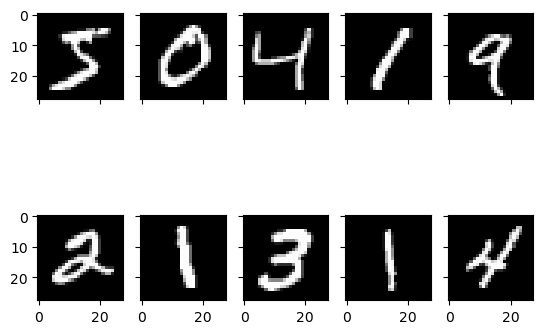

In [6]:
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(X_train[0,:].reshape(28,28), cmap="gray")
axs[0, 1].imshow(X_train[1,:].reshape(28,28), cmap="gray")
axs[0, 2].imshow(X_train[2,:].reshape(28,28), cmap="gray")
axs[0, 3].imshow(X_train[3,:].reshape(28,28), cmap="gray")
axs[0, 4].imshow(X_train[4,:].reshape(28,28), cmap="gray")
axs[1, 0].imshow(X_train[5,:].reshape(28,28), cmap="gray")
axs[1, 1].imshow(X_train[6,:].reshape(28,28), cmap="gray")
axs[1, 2].imshow(X_train[7,:].reshape(28,28), cmap="gray")
axs[1, 3].imshow(X_train[8,:].reshape(28,28), cmap="gray")
axs[1, 4].imshow(X_train[9,:].reshape(28,28), cmap="gray")
for ax in fig.get_axes():
    ax.label_outer()

# k-means clustering

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into a set of distinct, non-overlapping subgroups or clusters. The goal of k-means is to group similar data points together and assign them to clusters, where each cluster is represented by a centroid (the mean of the data points in that cluster). The "k" in k-means refers to the number of clusters to be formed, and the algorithm aims to minimize the sum of squared distances between data points and their respective cluster centroids.

***
Task 1: Implement k-means clustering using Lloyd’s algorithm (k=10) on MNIST data:
***

In [11]:
def kmeans(train, k):
    j,j1=1,0
    n,d = train.shape
    centroid = train[random.sample(range(n),k),:]
    cluster = np.zeros((n,k))
    for i in range(n):
        s = np.argmin(np.sum((centroid - train[i,:])**2, axis=1))
        cluster[i,s]=1
    while abs(j-j1)>0.00001:
        j = np.linalg.norm(train-(cluster@centroid))**2
        centroid = (train.T @ (cluster / np.sum(cluster, axis=0))).T   
        cluster = np.zeros((n,k))
        for i in range(n):
            s = np.argmin(np.sum((centroid - train[i,:])**2, axis=1))
            cluster[i,s]=1
        j1 = np.linalg.norm(train-(cluster@centroid))**2
    return centroid

centers = kmeans(X_train, 10)


***
Visualize the cluster centers as a 28 × 28 image:
***

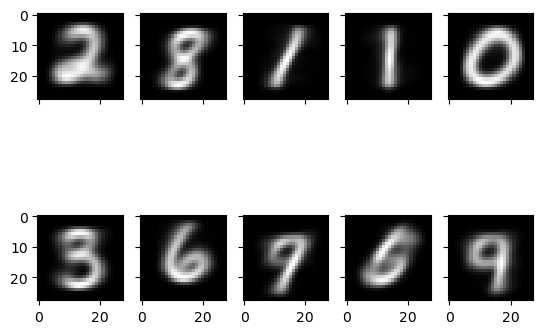

In [12]:
fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(centers[0,:].reshape(28,28), cmap="gray")
axs[0, 1].imshow(centers[1,:].reshape(28,28), cmap="gray")
axs[0, 2].imshow(centers[2,:].reshape(28,28), cmap="gray")
axs[0, 3].imshow(centers[3,:].reshape(28,28), cmap="gray")
axs[0, 4].imshow(centers[4,:].reshape(28,28), cmap="gray")
axs[1, 0].imshow(centers[5,:].reshape(28,28), cmap="gray")
axs[1, 1].imshow(centers[6,:].reshape(28,28), cmap="gray")
axs[1, 2].imshow(centers[7,:].reshape(28,28), cmap="gray")
axs[1, 3].imshow(centers[8,:].reshape(28,28), cmap="gray")
axs[1, 4].imshow(centers[9,:].reshape(28,28), cmap="gray")
for ax in fig.get_axes():
    ax.label_outer()
    

***
Run the algorithm for values of k = {2, 4, 8, 16, 32, 64}, and plot the training error:
***

([<matplotlib.axis.XTick at 0x7f8baaf92810>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

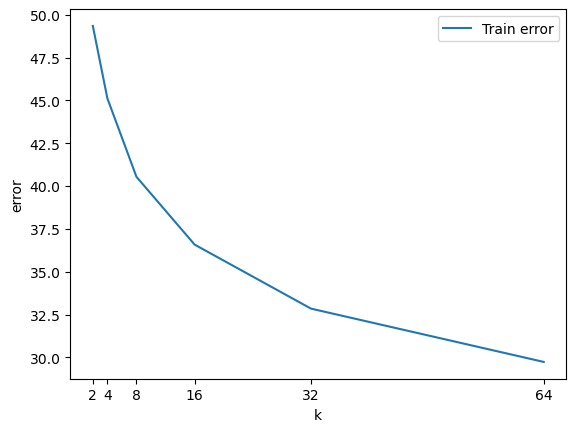

In [18]:
def kmeans(train, k):
    j,j1=1,0
    n,d = train.shape
    centroid = train[random.sample(range(n),k),:]
    cluster = np.zeros((n,k))
    for i in range(n):
        s = np.argmin(np.sum((centroid - train[i,:])**2, axis=1))
        cluster[i,s]=1
    while abs(j-j1)>0.00001:
        j = np.linalg.norm(train-(cluster@centroid))**2
        centroid = (train.T @ (cluster / np.sum(cluster, axis=0))).T   
        cluster = np.zeros((n,k))
        for i in range(n):
            s = np.argmin(np.sum((centroid - train[i,:])**2, axis=1))
            cluster[i,s]=1
        j1 = np.linalg.norm(train-(cluster@centroid))**2
    return j1/len(train)

kvalues = ([2,4,8,16,32,64])
train_err = ()
for k in kvalues:
    train_err = np.append(train_err, kmeans(X_train, k))
#     print(k)


plt.plot(kvalues, train_err, label='Train error')
plt.xlabel('k')  
plt.ylabel('error')
plt.legend()
plt.xticks(kvalues)

# OLS and Ridge Regression

***
- First, the dependent variable is one-hot-encoded, i.e. converted to categorical variable and dummies are created. 

- Second, perform Ridge regression using analytical solution.

- Third, calculate classification accuracy rates for training and test datasets.
***

In [174]:
mndata = MNIST('/Users/amre/Documents/GitHub/MNIST/data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

n, d = X_train.shape

labels_train_onehot=np.zeros((len(labels_train), 10))
for i in range(len(labels_train)): 
    labels_train_onehot[i,int(labels_train[i])]=1

# set reglambda to zero to run an OLS regression
reglambda = 1000

reg_matrix = reglambda * np.eye(d)

theta = np.linalg.pinv(X_train.T.dot(X_train) + reg_matrix).dot(X_train.T).dot(labels_train_onehot)


In [175]:
predictyy = np.matmul(X_train,theta)
trainyhat = np.argmax(predictyy, axis=1)
correct_rate = np.count_nonzero(np.array((labels_train == trainyhat)))/len(labels_train)
print("Classification accuracy for the train dataset: " + str(correct_rate)[:5])

predictyy = np.matmul(X_test,theta)
trainyhat = np.argmax(predictyy, axis=1)
correct_rate = np.count_nonzero(np.array((labels_test == trainyhat)))/len(labels_test)
print("Classification accuracy for the test dataset: " + str(correct_rate)[:5])


Classification accuracy for the train dataset: 0.851
Classification accuracy for the test dataset: 0.858


# Binary Regularized Logistic Regression

Let's first start with recognizing if a digit is a 2 or 7. Firstly, drop everything in the data except for twos and sevens. 

In [94]:
mndata = MNIST('/Users/amre/Documents/GitHub/MNIST/data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

data = pd.DataFrame(X_train)
data_y = pd.DataFrame(labels_train)
data.insert(0,"y",data_y)

data['y'] = data['y'].astype(int)

data = data.drop(data[ (data.y!=2) & (data.y!=7) ].index)
data.loc[data['y'] == 7, 'y'] = 1
data.loc[data['y'] == 2, 'y'] = -1

data_test = pd.DataFrame(X_test)
data_y_test = pd.DataFrame(labels_test)
data_test.insert(0,"y",data_y_test)
data_test['y'] = data_test['y'].astype(int)
data_test = data_test.drop(data_test[ (data_test.y!=2) & (data_test.y!=7) ].index)
data_test.loc[data_test['y'] == 7, 'y'] = 1
data_test.loc[data_test['y'] == 2, 'y'] = -1


## Gradient Descent 

***
Implement Regularized (Ridge) Logistic Regression using Gradient Descent (with analytic Jacobian)
***

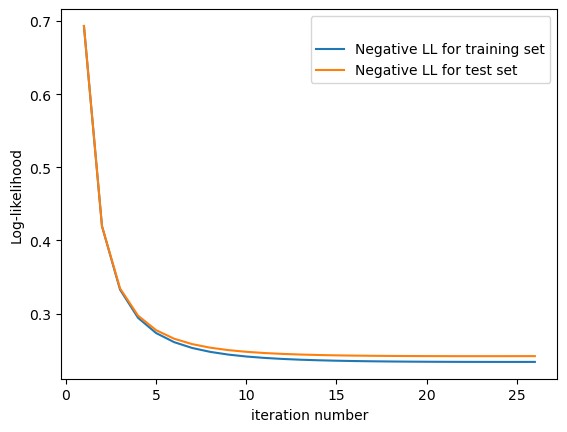

In [95]:
n, d = data.drop("y", axis = 1).shape

x = data.drop("y", axis = 1).values
y = data["y"].values
x_test = data_test.drop("y", axis = 1).values
y_test = data_test["y"].values

J = 10
J1 = 0

lambd = 0.1
jlisttest=()
jlist=()
iterations=()
iteration=0
mis_error=()
mis_error_test=()

step = 0.20
delta = np.zeros(d)
w_hat = np.zeros(d)

while abs(J-J1)>0.0001:
    

    b = sum(y-np.matmul(x,w_hat))/n
    J = sum(np.log(1 + np.exp(np.multiply(-y,(b+np.matmul(x,w_hat))))))/n + lambd*sum(w_hat**2)
    Jtest = sum(np.log(1 + np.exp(np.multiply(-y_test,(b+np.matmul(x_test,w_hat))))))/len(y_test) + lambd*sum(w_hat**2)
    
    mis_error = np.append(mis_error, np.count_nonzero(np.sign(np.matmul(x,w_hat)+b)-y)/len(y))
    mis_error_test = np.append(mis_error_test, np.count_nonzero(np.sign(np.matmul(x_test,w_hat)+b)-y_test)/len(y_test))


    iteration = iteration+1
    iterations = np.append(iterations, iteration)
    jlist = np.append(jlist, J)
    jlisttest = np.append(jlisttest, Jtest)

    
    mu = 1/(1+np.exp((-y)*(b+np.matmul(x,w_hat))))
    for i in range(d):
        delta[i] = sum((1-mu)*(-y)*x[:,i])/n + 2*lambd*w_hat[i]
    delta_b = sum((1-mu)*(-y))/n
    
    w_hat = w_hat - step*delta
    b = b - step*delta_b
    
    J1 = sum(np.log(1 + np.exp(np.multiply(-y,(b+np.matmul(x,w_hat))))))/n + lambd*sum(w_hat**2)
    
    
    
plt.plot(iterations, jlist, label='Negative LL for training set')
plt.plot(iterations, jlisttest, label='Negative LL for test set')
plt.xlabel('iteration number')  
plt.ylabel('Log-likelihood')  
plt.legend(title=' ')

***
Plot the misclassification error as a function of the iteration number:
***

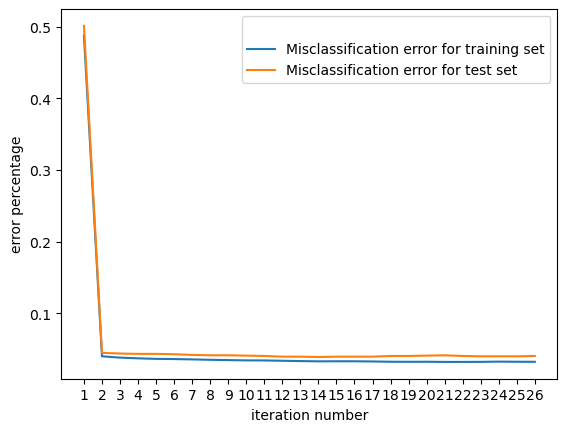

In [96]:
plt.plot(iterations, mis_error, label='Misclassification error for training set')
plt.plot(iterations, mis_error_test, label='Misclassification error for test set')
plt.xlabel('iteration number')  
plt.ylabel('error percentage')  
plt.xticks(iterations)
plt.legend(title=' ')

## Stochastic Gradient Descent 

***
Batch size 1:
***

In [88]:
import random

# Stochastic gradient decsent 

J = 10
J1 = 0

lambd = 0.1

jlist=()
iterations=()
iteration=0
mis_error=()
mis_error_test=()

step = 0.20
delta = np.zeros(d)
w_hat = np.zeros(d)
batchsize = 1
while abs(J-J1)>0.001:
    b = sum(y-np.matmul(x,w_hat))/n
    J = sum(np.log(1 + np.exp(np.multiply(-y,(b+np.matmul(x,w_hat))))))/n + lambd*sum(w_hat**2)
    
    mis_error = np.append(mis_error, np.count_nonzero(np.sign(np.matmul(x,w_hat)+b)-y)/len(y))
    mis_error_test = np.append(mis_error_test, np.count_nonzero(np.sign(np.matmul(x_test,w_hat)+b)-y_test)/len(y_test))


    iteration = iteration+1
    iterations = np.append(iterations, iteration)
    jlist = np.append(jlist, J)
    
    mu = 1/(1+np.exp((-y)*(b+np.matmul(x,w_hat))))
    
    sample = random.sample(range(len(y)), batchsize)
    for i in range(d):
        for r in sample:
            delta[i] = delta[i] + (1-mu[r])*(-y[r])*x[r,i] + 2*lambd*w_hat[i]
            delta_b = delta_b + (1-mu[r])*(-y[r])
        delta[i] = delta[i]/batchsize
    delta_b = delta_b/(batchsize*d)
        
    
    w_hat = w_hat - step*delta
    b = b - step*delta_b
    delta = np.zeros(d)
    delta_b = 0
    J1 = sum(np.log(1 + np.exp(np.multiply(-y,(b+np.matmul(x,w_hat))))))/n + lambd*sum(w_hat**2)
    
    print(J)
   


0.6929106124499804
0.6388285249205146
0.881511041260178
0.7136740023610502
0.5135742439367942
0.5090798742475613
0.4748993045785218
0.6717661348291273
0.5408354430148641
0.5140292378002767
0.5396182001877544
0.565682677977624
0.572005510963082
0.5422714763986389
0.4421776275658786
0.4130520951510903
0.5361107229084898
0.5221274189037871
0.48279321622236315
0.4763262197641299
0.37392135153101874
0.3669759631430293
0.363145385933988
0.33589615607023604
0.31311442990482513
0.30825504373152646
0.30415011020805127
0.29991079850072755


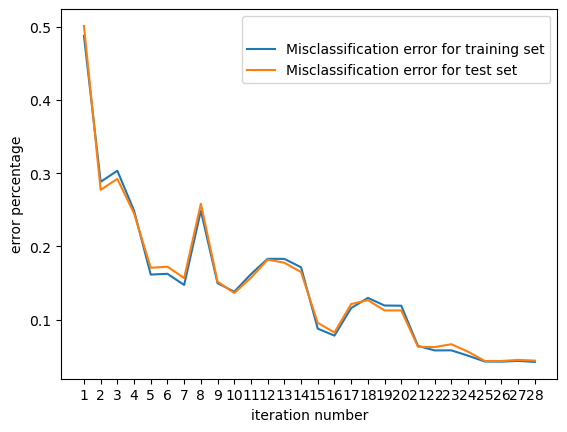

In [89]:
plt.plot(iterations, mis_error, label='Misclassification error for training set')
plt.plot(iterations, mis_error_test, label='Misclassification error for test set')
plt.xlabel('iteration number')  
plt.ylabel('error percentage')  
plt.xticks(iterations)
plt.legend(title=' ')

***
Batch size 100:
***

In [90]:
import random

# Stochastic gradient decsent 

J = 10
J1 = 0

lambd = 0.1

jlist=()
iterations=()
iteration=0
mis_error=()
mis_error_test=()

step = 0.20
delta = np.zeros(d)
w_hat = np.zeros(d)
batchsize = 100
while abs(J-J1)>0.001:
    b = sum(y-np.matmul(x,w_hat))/n
    J = sum(np.log(1 + np.exp(np.multiply(-y,(b+np.matmul(x,w_hat))))))/n + lambd*sum(w_hat**2)
    
    mis_error = np.append(mis_error, np.count_nonzero(np.sign(np.matmul(x,w_hat)+b)-y)/len(y))
    mis_error_test = np.append(mis_error_test, np.count_nonzero(np.sign(np.matmul(x_test,w_hat)+b)-y_test)/len(y_test))


    iteration = iteration+1
    iterations = np.append(iterations, iteration)
    jlist = np.append(jlist, J)
    
    mu = 1/(1+np.exp((-y)*(b+np.matmul(x,w_hat))))
    
    sample = random.sample(range(len(y)), batchsize)
    for i in range(d):
        for r in sample:
            delta[i] = delta[i] + (1-mu[r])*(-y[r])*x[r,i] + 2*lambd*w_hat[i]
            delta_b = delta_b + (1-mu[r])*(-y[r])
        delta[i] = delta[i]/batchsize
    delta_b = delta_b/(batchsize*d)
        
    
    w_hat = w_hat - step*delta
    b = b - step*delta_b
    delta = np.zeros(d)
    delta_b = 0
    J1 = sum(np.log(1 + np.exp(np.multiply(-y,(b+np.matmul(x,w_hat))))))/n + lambd*sum(w_hat**2)
    
    print(J)
   


0.6929106124499804
0.4016473651145119
0.3311448859365401
0.294055547298557
0.27640051039814606
0.26502022819317955
0.25670592958968563
0.25099532942007086


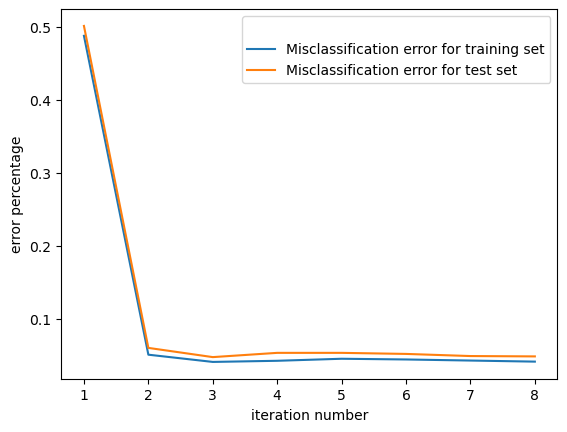

In [91]:
plt.plot(iterations, mis_error, label='Misclassification error for training set')
plt.plot(iterations, mis_error_test, label='Misclassification error for test set')
plt.xlabel('iteration number')  
plt.ylabel('error percentage')  
plt.xticks(iterations)
plt.legend(title=' ')

# Multinomial Logit Regression (Pytorch)

***
Now, estimate Multinomial Logit Regression using all 10 groups, and implement using Pytorch.
***

In [188]:
import torch

mndata = MNIST('/Users/amre/Documents/GitHub/MNIST/data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

W = torch.zeros(784, 10, requires_grad=True)

epochs = 50

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(labels_train).long()

step_size = 0.15

for epoch in range(epochs):
    y_hat = torch.matmul(X_train_tensor, W)
    loss = torch.nn.functional.multi_margin_loss(y_hat, y_train_tensor)
    loss.backward()
    W.data = W.data - step_size * W.grad
    W.grad.zero_()
    
# Classification accuracy for the train dataset
yhat = np.argmax(np.matmul(X_train,W.detach()), axis=1)
train_accuracy = 1-np.count_nonzero(yhat-labels_train)/len(labels_train)
print("Classification accuracy for the train dataset: " + str(train_accuracy)[:5])

# Classification accuracy for the test dataset
yhat = np.argmax(np.matmul(X_test,W.detach()), axis=1)
test_accuracy = 1-np.count_nonzero(yhat-labels_test)/len(labels_test)
print("Classification accuracy for the test dataset: " + str(test_accuracy)[:5])


Classification accuracy for the train dataset: 0.862
Classification accuracy for the test dataset: 0.871


# Neural Networks

***
- We start with wide and shallow network (adding only one hidden layer with 64 neurons).

- The total number of parameters of the model is 784 ∗ 64 + 64 ∗ 10 + 64 + 10 = 50,890
***

In [227]:
from mnist import MNIST
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

mndata = MNIST('/Users/amre/Documents/GitHub/MNIST/data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(labels_train).long()

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(labels_test).long()

# Initialize the parameters to be random draws
W00 = torch.randn(784, 64)
W01 = torch.randn(64, 10)
b00 = torch.randn(1, 64)
b01 = torch.randn(1, 10)

# Shrink the parameters
W00 = (W00-0.5)*(1/(784**0.5))
W01 = (W01-0.5)*(1/(64**0.5))
b00 = (b00-0.5)*(1/(64**0.5))
b01 = (b01-0.5)*(1/(10**0.5))

W00.requires_grad = True
W01.requires_grad = True
b00.requires_grad = True
b01.requires_grad = True

epochs = 5000
loss_list_a = ()

learning_rate = 1e-2
optimizer = torch.optim.Adam((W00,W01,b00,b01), lr=learning_rate)

for epoch in range(epochs):
    optimizer.zero_grad()
    y_hat = ((X_train_tensor.mm(W00) + b00).clamp(min=0)).mm(W01) + b01
    loss = torch.nn.functional.cross_entropy(y_hat, y_train_tensor)
    loss_list_a = np.append(loss_list_a, loss.data)
    loss.backward()
    yhat = np.argmax(y_hat.data, axis=1)
    print(np.count_nonzero(yhat-labels_train)/len(labels_train))
    if (1-np.count_nonzero(yhat-labels_train)/len(labels_train))>0.99:
        break    
    optimizer.step()

xaxis = np.arange(len(loss_list_a))
plt.plot(xaxis, loss_list_a)
plt.xlabel('iterations')  
plt.ylabel('loss function')  

# (wide and shallow network) accuracy rate on train data
yhat = np.argmax(y_hat.data, axis=1)
train_accuracy = 1-np.count_nonzero(yhat-labels_train)/len(labels_train)
print("Classification accuracy for the train dataset: " + str(train_accuracy)[:5])

# (wide and shallow network) accuracy rate for test data
y_hat_test = ((X_test_tensor.mm(W00) + b00).clamp(min=0)).mm(W01) + b01
yhat_test = np.argmax(y_hat_test.data, axis=1)
test_accuracy = 1-np.count_nonzero(yhat_test-labels_test)/len(labels_test)
print("Classification accuracy for the test dataset: " + str(test_accuracy)[:5])



Classification accuracy for the train dataset: 0.889
Classification accuracy for the test dataset: 0.876


***
- We add one more layer, but make both layers less wide.

- The total number of parameters of the model is 784 ∗ 32 + 32 ∗ 32 + 32 ∗ 10 + 32 + 32 + 10 = 26,506
***

Classification accuracy for the train dataset: 0.990
Classification accuracy for the test dataset: 0.962


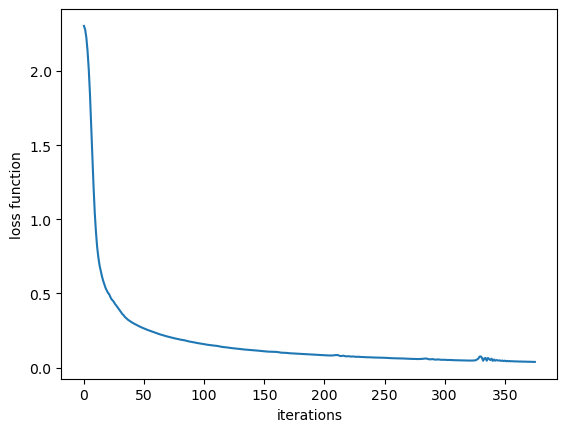

In [217]:
W0 = (torch.rand(784, 32)-0.5)*(1/(784**0.5))
W1 = (torch.rand(32, 32))
W2 = (torch.rand(32, 10))
b0 = (torch.rand(1, 32))
b1 = (torch.rand(1, 32))
b2 = (torch.rand(1, 10))

W1 = (W1 -0.5)*(1/(32**0.5))
W2 = (W2 -0.5)*(1/(32**0.5))
b0 = (b0 -0.5)*(1/(32**0.5))
b1 = (b1 -0.5)*(1/(32**0.5))
b2 = (b2 -0.5)*(1/(10**0.5))

W0.requires_grad = True
W1.requires_grad = True
W2.requires_grad = True
b0.requires_grad = True
b1.requires_grad = True
b2.requires_grad = True

epochs = 5000
loss_list_b = ()

learning_rate = 1e-2
optimizer = torch.optim.Adam((W0,W1,W2,b0,b1,b2), lr=learning_rate)

for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = ((((X_train_tensor.mm(W0) + b0).clamp(min=0)).mm(W1) + b1).clamp(min=0)).mm(W2) + b2
    loss = F.cross_entropy(predictions, y_train_tensor)
    loss_list_b = np.append(loss_list_b, loss.data)
    loss.backward()
    yhat = np.argmax(predictions.data, axis=1)
    if (1-np.count_nonzero(yhat-labels_train)/len(labels_train))>0.99:
        break
    optimizer.step()


xaxis = np.arange(len(loss_list_b))
plt.plot(xaxis, loss_list_b)
plt.xlabel('iterations')  
plt.ylabel('loss function')  


# accuracy rate on train data
yhat = np.argmax(predictions.data, axis=1)
train_accuracy = 1-np.count_nonzero(yhat-labels_train)/len(labels_train)
print("Classification accuracy for the train dataset: " + str(train_accuracy)[:5])

# accuracy rate for test data
y_hat_test = ((((X_test_tensor.mm(W0) + b0).clamp(min=0)).mm(W1) + b1).clamp(min=0)).mm(W2) + b2
yhat_test = np.argmax(y_hat_test.data, axis=1)
test_accuracy = 1-np.count_nonzero(yhat_test-labels_test)/len(labels_test)
print("Classification accuracy for the test dataset: " + str(test_accuracy)[:5])



# Principal Component Analysis

In [230]:
from mnist import MNIST
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


mndata = MNIST('/Users/amre/Documents/GitHub/MNIST/data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_train = X_train/255.0

X_test = X_train[50000:60000,]
labels_test = labels_train[50000:60000,]

X_train = X_train[0:50000,]
labels_train = labels_train[0:50000,]

X_train_demeaned = X_train - np.mean(X_train,axis=0)
cov_matrix = (X_train_demeaned.T.dot(X_train_demeaned))/len(X_train_demeaned)
eigval, eigvec = (np.linalg.eig(cov_matrix))

# Print five largest eigenvalue of the cov_matrix
eigenv = eigval[([0,1,2,3,4])]
print("Five largest eigenvalue of the cov_matrix: " + str(eigenv))

kvalues = np.arange(1,101)
eigval_sorted = np.argsort(-eigval)
lambda_share = ()
rec_error = ()
rec_error_test = ()
X_test_demeaned = X_test - np.mean(X_train,axis=0)
for k in kvalues:
    eigval_new = eigval_sorted[:k]
    eigvec_new = eigvec[:,eigval_new]
    reconstructed = X_train_demeaned @ eigvec_new @ eigvec_new.T + np.mean(X_train,axis=0)
    reconstructed = reconstructed.real
    reconstructed_test = X_test_demeaned @ eigvec_new @ eigvec_new.T + np.mean(X_train,axis=0)
    reconstructed_test = reconstructed_test.real
    rec_error = np.append(rec_error, (((X_train-reconstructed)**2)/len(reconstructed)).sum())
    rec_error_test = np.append(rec_error_test, (((X_test-reconstructed_test)**2)/len(reconstructed_test)).sum())
    lambda_share = np.append(lambda_share, (1+ np.sum(sorted(-eigval)[:k])/np.sum(eigval)))


Five largest eigenvalue of the cov_matrix: [5.14833344+0.j 3.72998949+0.j 3.28422091+0.j 2.84218925+0.j
 2.56669696+0.j]


***
Plot the reconstruction error from k = 1 to 100. 
***

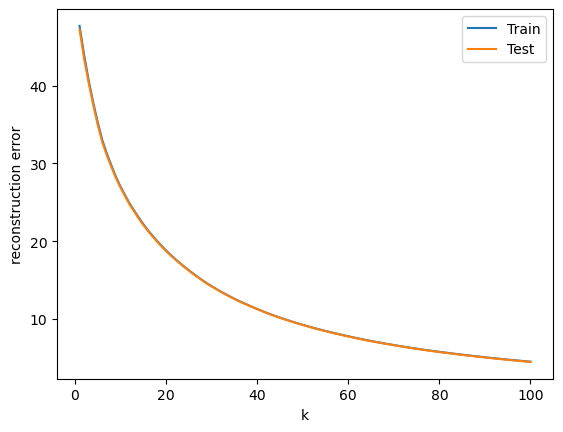

In [212]:
plt.plot(kvalues, rec_error, label='Train')
plt.plot(kvalues, rec_error_test, label='Test')
plt.xlabel('k')  
plt.ylabel('reconstruction error')
plt.legend()


***
Display the first 10 eigenvectors as images (first 10 eigenvectors show the pixels that have the biggest variation)
***

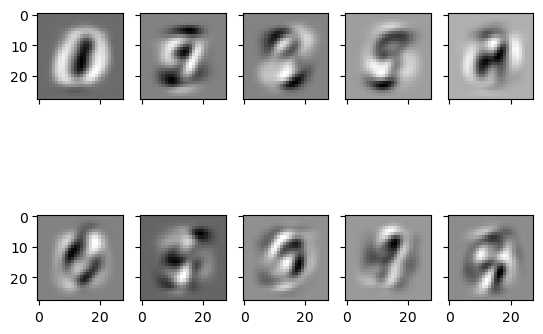

In [213]:
eigval_new = eigval_sorted[:10]
eigvec_new = eigvec[:,eigval_new].real

fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(eigvec_new[:,0].reshape(28,28), cmap="gray")
axs[0, 1].imshow(eigvec_new[:,1].reshape(28,28), cmap="gray")
axs[0, 2].imshow(eigvec_new[:,2].reshape(28,28), cmap="gray")
axs[0, 3].imshow(eigvec_new[:,3].reshape(28,28), cmap="gray")
axs[0, 4].imshow(eigvec_new[:,4].reshape(28,28), cmap="gray")
axs[1, 0].imshow(eigvec_new[:,5].reshape(28,28), cmap="gray")
axs[1, 1].imshow(eigvec_new[:,6].reshape(28,28), cmap="gray")
axs[1, 2].imshow(eigvec_new[:,7].reshape(28,28), cmap="gray")
axs[1, 3].imshow(eigvec_new[:,8].reshape(28,28), cmap="gray")
axs[1, 4].imshow(eigvec_new[:,9].reshape(28,28), cmap="gray")
for ax in fig.get_axes():
    ax.label_outer() 
    



***
Visualize a set of reconstructed digits from the training set for different values of k:
***

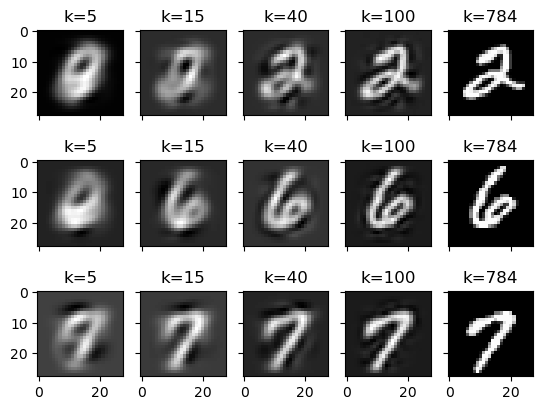

In [214]:
eigval_sorted = np.argsort(-eigval)
kvalues = ([5,15,40,100])
twos = np.zeros(len(eigval))
sixes = np.zeros(len(eigval))
sevens = np.zeros(len(eigval))

for k in kvalues:
    eigval_new = eigval_sorted[:k]
    eigval_new = eigvec[:,eigval_new]
    reconstructed = X_train_demeaned @ eigval_new @ eigval_new.T + np.mean(X_train,axis=0)
    reconstructed = reconstructed.real
    twos = np.c_[twos, reconstructed[5]]
    sixes = np.c_[sixes, reconstructed[13]]
    sevens = np.c_[sevens, reconstructed[15]]

# plotting

fig, axs = plt.subplots(3, 5)
axs[0, 0].imshow(twos[:,1].reshape(28,28), cmap="gray")
axs[0, 0].set_title("k=5")
axs[0, 1].imshow(twos[:,2].reshape(28,28), cmap="gray")
axs[0, 1].set_title("k=15")
axs[0, 2].imshow(twos[:,3].reshape(28,28), cmap="gray")
axs[0, 2].set_title("k=40")
axs[0, 3].imshow(twos[:,4].reshape(28,28), cmap="gray")
axs[0, 3].set_title("k=100")
axs[0, 4].imshow(X_train[5,:].reshape(28,28), cmap="gray")
axs[0, 4].set_title("k=784")


axs[1, 0].imshow(sixes[:,1].reshape(28,28), cmap="gray")
axs[1, 0].set_title("k=5")
axs[1, 1].imshow(sixes[:,2].reshape(28,28), cmap="gray")
axs[1, 1].set_title("k=15")
axs[1, 2].imshow(sixes[:,3].reshape(28,28), cmap="gray")
axs[1, 2].set_title("k=40")
axs[1, 3].imshow(sixes[:,4].reshape(28,28), cmap="gray")
axs[1, 3].set_title("k=100")
axs[1, 4].imshow(X_train[13,:].reshape(28,28), cmap="gray")
axs[1, 4].set_title("k=784")

axs[2, 0].imshow(sevens[:,1].reshape(28,28), cmap="gray")
axs[2, 0].set_title("k=5")
axs[2, 1].imshow(sevens[:,2].reshape(28,28), cmap="gray")
axs[2, 1].set_title("k=15")
axs[2, 2].imshow(sevens[:,3].reshape(28,28), cmap="gray")
axs[2, 2].set_title("k=40")
axs[2, 3].imshow(sevens[:,4].reshape(28,28), cmap="gray")
axs[2, 3].set_title("k=100")
axs[2, 4].imshow(X_train[15,:].reshape(28,28), cmap="gray")
axs[2, 4].set_title("k=784")


for ax in fig.get_axes():
    ax.label_outer()
    